In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.2-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"
import findspark
findspark.init()

In [20]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.getOrCreate()

Riset_Research = spark.read.option("inferSchema", "true").csv("Riset Pemahaman Masyarakat mengenai keamanan big data.csv", header = True)

Riset_Research.registerTempTable("Riset_Research")

+-----+---+
|knows|con|
+-----+---+
|Tidak|  6|
|   Ya|  6|
+-----+---+



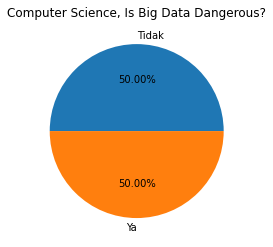

In [40]:
vis1 = spark.sql("""
    SELECT 
      Big_Data_Berbahaya AS knows,
      COUNT(Big_Data_Berbahaya) AS con
    FROM Riset_Research 
    WHERE
	    Jurusan_Computer_Science = 'Ya'
     GROUP BY 
      knows 
""")

vis1.show()

vis1 = vis1.toPandas()
plt.pie(vis1["con"], labels=vis1["knows"], autopct="%.2f%%")
plt.title("Computer Science, Is Big Data Dangerous?")
plt.show()

+-----+---+
|knows|con|
+-----+---+
|Tidak| 28|
|   Ya| 20|
+-----+---+



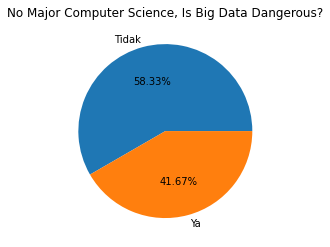

In [43]:
vis2 = spark.sql("""
    SELECT 
      Big_Data_Berbahaya AS knows,
      COUNT(Big_Data_Berbahaya) AS con
    FROM Riset_Research 
    WHERE
	    Jurusan_Computer_Science = 'Tidak'
     GROUP BY 
      knows 
""")

vis2.show()

vis2 = vis2.toPandas()
plt.pie(vis2["con"], labels=vis2["knows"], autopct="%.2f%%")
plt.title("No Major Computer Science, Is Big Data Dangerous?")
plt.show()